##Mount Google Drive

In [1]:
import os
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


##Set up Root

In [2]:
# Specify the directory path
root = '/gdrive/MyDrive/Irfan/ESC-50-master'
!ls '/gdrive/MyDrive/Irfan/ESC-50-master'

audio	   LICENSE	    meta	README.md	  tests
esc50.gif  melspectrograms  pytest.ini	requirements.txt


##Import Libraries

In [3]:
import numpy as np
import pandas as pd
import random
from scipy.io import wavfile
from sklearn import preprocessing
import librosa.display
import librosa
import matplotlib.pyplot as plt
import os

##Save Melspectogram Function

In [4]:
def save_melspectrogram(directory_path, file_name, dataset_split, label, sampling_rate=44100):
    """ Will save spectogram into current directory"""

    testdir = root + '/melspectrograms/testing/{label}'.format(label=label)
    traindir = root + '/melspectrograms/training/{label}'.format(label=label)

    if os.path.exists(testdir) and os.path.exists(traindir):
      testdirc = os.listdir(testdir)
      traindirc = os.listdir(traindir)
      number_filestest = len(testdirc)
      number_filestrain = len(traindirc)

      if number_filestest == 8 and number_filestrain == 32:
        return

    path_to_file = os.path.join(directory_path, file_name)
    data, sr = librosa.load(path_to_file, sr=sampling_rate, mono=True)
    data = data.astype(float)
    data = preprocessing.scale(data)


    melspec = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128)
    # Convert to log scale (dB) using the peak power (max) as reference
    log_melspec = librosa.power_to_db(melspec, ref=np.max)  
    librosa.display.specshow(log_melspec, sr=sr)
    
    # create saving directory
    directory = root + '/melspectrograms/{dataset}/{label}'.format(dataset=dataset_split, label=label)
    if not os.path.exists(directory):
      os.makedirs(directory)
    
    plt.savefig(directory + '/' + file_name.strip('.wav') + '.png')

##Split train and test dataset function 

In [5]:
def _train_test_split(filenames, train_pct):
    """Create train and test splits for ESC-50 data"""
    random.seed(2018)
    n_files = len(filenames)
    n_train = int(n_files*train_pct)
    train = np.random.choice(n_files, n_train, replace=False)
        
    # split on training indices
    training_idx = np.isin(range(n_files), train)
    training_set = np.array(filenames)[training_idx]
    testing_set = np.array(filenames)[~training_idx]
    
    return {'training': training_set, 'testing': testing_set}

##Read in Metadata

In [6]:
dataset_dir = root

# Load meta data for audio files
meta_data = pd.read_csv(dataset_dir + '/meta/esc50.csv')

labs = meta_data.category
unique_labels = labs.unique()
meta_data.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


## Extract and Save the Melspectogram

Proccesing dog audio files
---Time elapsed: 1.0455567836761475 seconds ---
Proccesing chirping_birds audio files
---Time elapsed: 0.36513447761535645 seconds ---
Proccesing vacuum_cleaner audio files
---Time elapsed: 0.5551152229309082 seconds ---
Proccesing thunderstorm audio files
---Time elapsed: 0.5879123210906982 seconds ---
Proccesing door_wood_knock audio files
---Time elapsed: 0.5903539657592773 seconds ---
Proccesing can_opening audio files
---Time elapsed: 0.49262142181396484 seconds ---
Proccesing crow audio files
---Time elapsed: 0.5001342296600342 seconds ---
Proccesing clapping audio files
---Time elapsed: 0.5694050788879395 seconds ---
Proccesing fireworks audio files
---Time elapsed: 0.518214225769043 seconds ---
Proccesing chainsaw audio files
---Time elapsed: 0.5100250244140625 seconds ---
Proccesing airplane audio files
---Time elapsed: 0.5221652984619141 seconds ---
Proccesing mouse_click audio files
---Time elapsed: 0.3023951053619385 seconds ---
Proccesing pouring

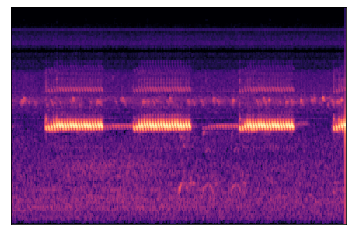

In [7]:
import time

for label in unique_labels:
    start_time = time.time()
    print("Proccesing {} audio files".format(label))
    current_label_meta_data = meta_data[meta_data.category == label]
    datasets = _train_test_split(current_label_meta_data.filename, train_pct=0.8)
    for dataset_split, audio_files in datasets.items():
        for filename in audio_files:
            directory_path = dataset_dir + '/audio/'
            save_melspectrogram(directory_path, filename, dataset_split, label, sampling_rate=44100)
    print("---Time elapsed: %s seconds ---" % (time.time() - start_time))